### 사전준비

In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션MNIST 데이터

#### 데이터 로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
train_scaled = train_input / 255.0  # 0~1 실수값 변경

In [7]:
print(train_scaled.shape)


(60000, 28, 28)


In [8]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [11]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [23]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [19]:
# 함수 사용예
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선, 정확도

In [24]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)

Epoch 1/5
1500/1500 - 3s - loss: 0.5319 - accuracy: 0.8110 - 3s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 3s - loss: 0.3922 - accuracy: 0.8576 - 3s/epoch - 2ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3569 - accuracy: 0.8733 - 2s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 3s - loss: 0.3351 - accuracy: 0.8804 - 3s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 3s - loss: 0.3203 - accuracy: 0.8872 - 3s/epoch - 2ms/step


In [27]:
history.history

{'loss': [0.5318799614906311,
  0.39221757650375366,
  0.35690730810165405,
  0.335071861743927,
  0.32031330466270447],
 'accuracy': [0.8109583258628845,
  0.8575833439826965,
  0.8733124732971191,
  0.8804166913032532,
  0.8871666789054871]}

#### 손실곡선 차트

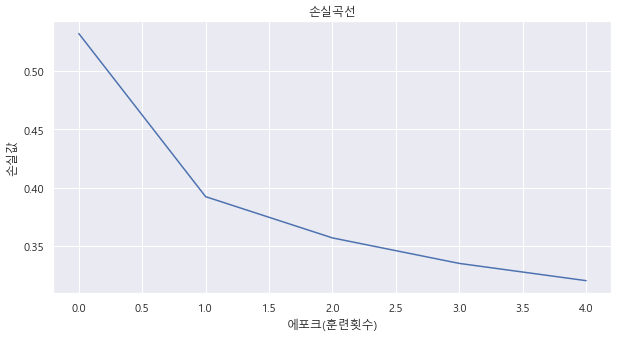

In [28]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

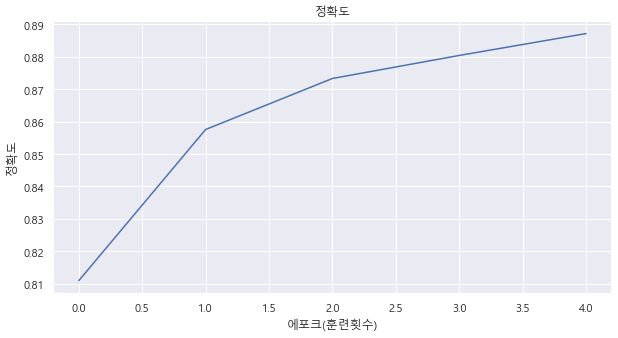

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번 훈련

In [30]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5297 - accuracy: 0.8136
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3537 - accuracy: 0.8738
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8789
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3180 - accuracy: 0.8868
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3069 - accuracy: 0.8911
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2962 - accuracy: 0.8951
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2895 - accuracy: 0.8986
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2820 - accuracy: 0.9014
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.274

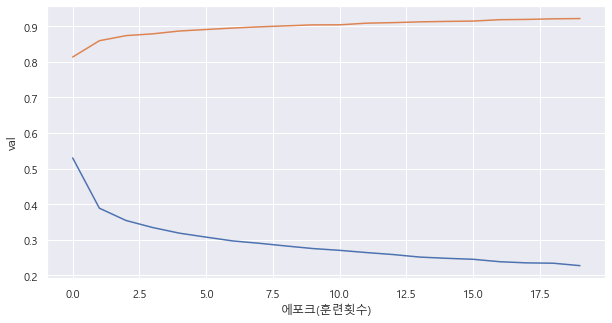

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('정확도')
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [32]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5243 - accuracy: 0.8154 - val_loss: 0.3989 - val_accuracy: 0.8583
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3891 - accuracy: 0.8593 - val_loss: 0.3690 - val_accuracy: 0.8704
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3541 - accuracy: 0.8727 - val_loss: 0.3682 - val_accuracy: 0.8713
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8806 - val_loss: 0.3582 - val_accuracy: 0.8773
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3165 - accuracy: 0.8865 - val_loss: 0.3768 - val_accuracy: 0.8705
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8901 - val_loss: 0.3669 - val_accuracy: 0.8802
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8949 - val_loss: 0.3442 - val_accuracy:

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

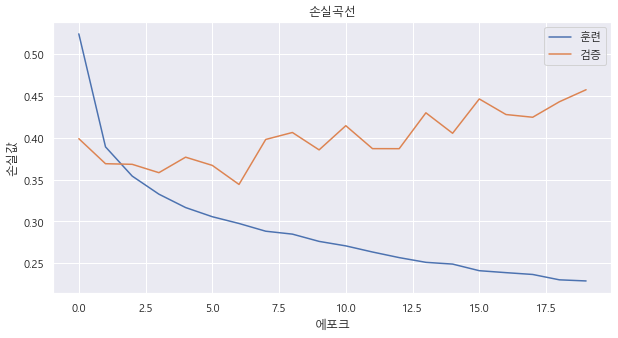

In [35]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 드롭아웃


In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5878 - accuracy: 0.7931 - val_loss: 0.4282 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4505 - accuracy: 0.8415 - val_loss: 0.3924 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4245 - accuracy: 0.8535 - val_loss: 0.3942 - val_accuracy: 0.8612
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8588 - val_loss: 0.4138 - val_accuracy: 0.8614
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3999 - accuracy: 0.8622 - val_loss: 0.3951 - val_accuracy: 0.8689
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3949 - accuracy: 0.8654 - val_loss: 0.3882 - val_accuracy: 0.8712
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3948 - accuracy: 0.8679 - val_loss: 0.3854 - val_accuracy:

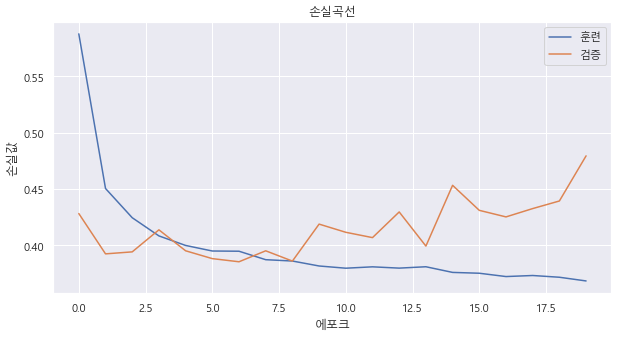

In [38]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [39]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3671 - accuracy: 0.8733 - val_loss: 0.4011 - val_accuracy: 0.8700
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3484 - accuracy: 0.8751 - val_loss: 0.3985 - val_accuracy: 0.8775
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3372 - accuracy: 0.8780 - val_loss: 0.3842 - val_accuracy: 0.8802
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.8817 - val_loss: 0.3897 - val_accuracy: 0.8823
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8837 - val_loss: 0.3714 - val_accuracy: 0.8802
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8857 - val_loss: 0.3712 - val_accuracy: 0.8861
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3084 - accuracy: 0.8855 - val_loss: 0.3770 - val_accuracy:

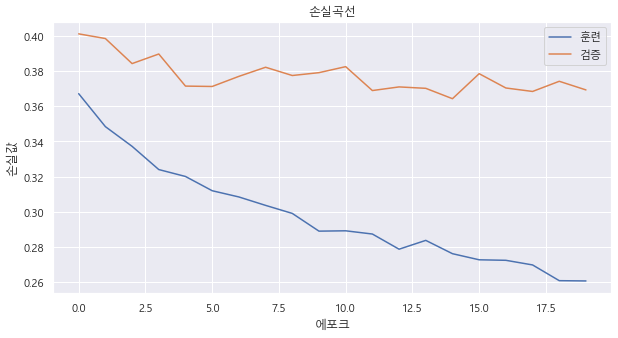

In [40]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5917 - accuracy: 0.7931 - val_loss: 0.4252 - val_accuracy: 0.8461
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4390 - accuracy: 0.8430 - val_loss: 0.4098 - val_accuracy: 0.8489
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4026 - accuracy: 0.8544 - val_loss: 0.3708 - val_accuracy: 0.8654
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8610 - val_loss: 0.3493 - val_accuracy: 0.8756
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8669 - val_loss: 0.3531 - val_accuracy: 0.8731
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8701 - val_loss: 0.3397 - val_accuracy: 0.8766
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.8748 - val_loss: 0.3337 - val_accuracy:

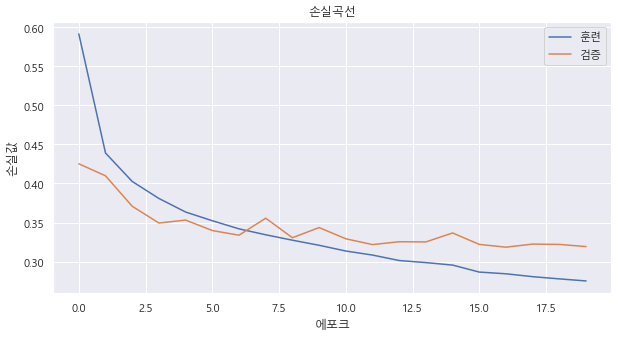

In [43]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

#### 모델 저장/로드

In [44]:
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [46]:
# 훈련된 전체데이어 저장
model.save('./data/model.h5')

##### 가중치 모델 로드

In [47]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [48]:
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체모델 로드

In [49]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3192 - accuracy: 0.8856


[0.3191588222980499, 0.8855833411216736]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터저장하면 모든 기능 수행

In [50]:
model.predict(val_scaled)

375/375 [==============================] - 1s 2ms/step


array([[7.06094818e-12, 8.20141719e-18, 5.15302482e-13, ...,
        1.70848158e-09, 9.99999404e-01, 1.11690964e-13],
       [9.74293002e-09, 3.16648047e-18, 8.19858226e-09, ...,
        1.16722181e-12, 1.00000000e+00, 4.66047048e-14],
       [1.08515421e-12, 2.63226788e-12, 2.33511631e-17, ...,
        9.99880075e-01, 1.75964729e-11, 3.57223371e-07],
       ...,
       [5.60019316e-06, 2.74817537e-16, 9.21324705e-09, ...,
        3.38633965e-09, 9.99993324e-01, 1.18612165e-09],
       [6.33463593e-09, 3.24334176e-17, 1.06624531e-09, ...,
        1.73060247e-11, 1.00000000e+00, 2.04873536e-14],
       [4.85168546e-01, 7.73727788e-06, 1.39049243e-03, ...,
        7.36154325e-05, 1.07930073e-05, 6.26133680e-02]], dtype=float32)

In [52]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8855833333333333

In [55]:
val_labels

array([8, 8, 7, ..., 8, 8, 0], dtype=int64)

#### 콜백 Callback

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5888 - accuracy: 0.7944 - val_loss: 0.4248 - val_accuracy: 0.8448
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4388 - accuracy: 0.8410 - val_loss: 0.3922 - val_accuracy: 0.8552
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4068 - accuracy: 0.8505 - val_loss: 0.3746 - val_accuracy: 0.8604
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8615 - val_loss: 0.3617 - val_accuracy: 0.8667
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8646 - val_loss: 0.3626 - val_accuracy: 0.8700
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8710 - val_loss: 0.3484 - val_accuracy: 0.8739
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3462 - accuracy: 0.8710 - val_loss: 0.3437 - val_accuracy:

In [57]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8875


[0.3151463568210602, 0.887499988079071]

#### 조기종료

In [71]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# 베스트 모델을 저장할 콜백
# save_best_only=True 가장 좋은 모델 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1480/1500 [============================>.] - ETA: 0s - loss: 0.5948 - accuracy: 0.7905
Epoch 1: val_loss improved from inf to 0.44602, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5940 - accuracy: 0.7906 - val_loss: 0.4460 - val_accuracy: 0.8400
Epoch 2/20
1486/1500 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8406
Epoch 2: val_loss improved from 0.44602 to 0.38739, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8408 - val_loss: 0.3874 - val_accuracy: 0.8608
Epoch 3/20
1489/1500 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8526
Epoch 3: val_loss improved from 0.38739 to 0.36519, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4050 - accuracy: 0.8526 - val_loss: 0.3652 - val_accuracy: 0.8645
Epoch 4/20
1484/1500 [===================

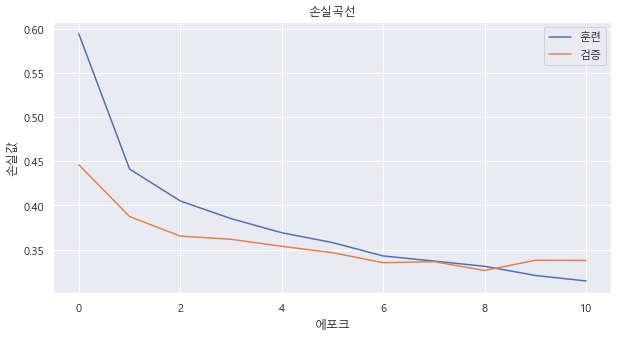

In [72]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실곡선')
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련','검증'])
plt.show()

In [73]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # 10번째에서 멈춤(드랍아웃) - 9번째 모델이 저장됨

10

In [75]:
model.evaluate(val_scaled, val_target) # 9번째 에포크값

375/375 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8804


[0.32632461190223694, 0.8804166913032532]

### 조기종료된 모델 저장값 / 체크포인트로 저장된 모델 저장값 비교

In [76]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8804


[0.32632461190223694, 0.8804166913032532]

In [77]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 1ms/step


0.8804166666666666

In [80]:
### 예측결과
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)